# Michał Szczurek Laboratrium 3.

In [1]:
from sympy import *
import numpy as np
import scipy.interpolate as interpolate
import matplotlib.pyplot as plt
import pandas as pd
x = symbols('x')

### Zadanie 1. ###

#### a)

Zdecydowałem się na użycie biblioteki matplotlib do rysowania wykresów zamiast sympy, ponieważ sympy stosuje usprawnienia w rysowaniu wykresów, które powodowały wystąpienie błędu lub koenieczność zadowolenia się niedokładnym rysunkiem dla 15 pochodnej.

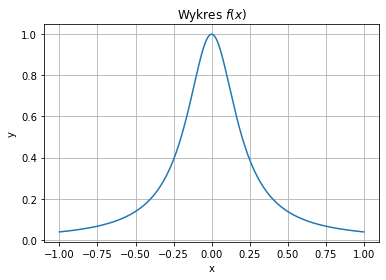

In [2]:
func = 1/(1+25*x**2)
points = np.linspace(-1,1,1000)
res = [func.subs(x,p) for p in points]
plt.xlabel("x")
plt.plot(points, res)
plt.ylabel("y")
plt.title("Wykres $f(x)$")
plt.grid()
plt.show()

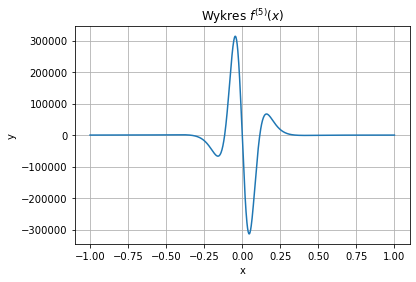

3750000*x*(-10000*x**4/(25*x**2 + 1)**2 + 400*x**2/(25*x**2 + 1) - 3)/(25*x**2 + 1)**4

In [3]:
func_5 = diff(func,x,5)
points = np.linspace(-1,1,1000)
res = [func_5.subs(x,p) for p in points]
plt.xlabel("x")
plt.plot(points, res)
plt.ylabel("y")
plt.title("Wykres $f^{(5)}(x)$")
plt.grid()
plt.show()
func_5

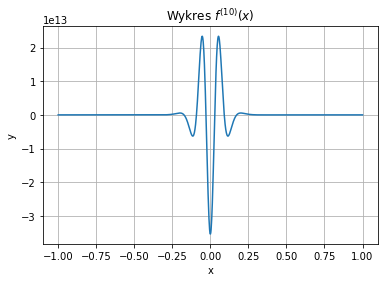

35437500000000*(10000000000*x**10/(25*x**2 + 1)**5 - 900000000*x**8/(25*x**2 + 1)**4 + 28000000*x**6/(25*x**2 + 1)**3 - 350000*x**4/(25*x**2 + 1)**2 + 1500*x**2/(25*x**2 + 1) - 1)/(25*x**2 + 1)**6

In [4]:
func_10 = diff(func,x,10)
points = np.linspace(-1,1,1000)
res = [func_10.subs(x,p) for p in points]
plt.xlabel("x")
plt.plot(points, res)
plt.ylabel("y")
plt.title("Wykres $f^{(10)}(x)$")
plt.grid()
plt.show()
func_10

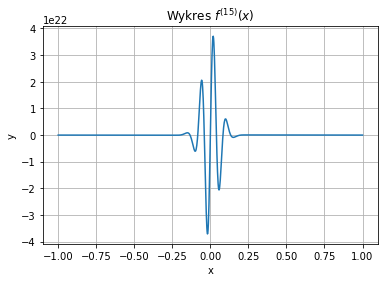

3192564375000000000000000*x*(-12500000000000*x**14/(25*x**2 + 1)**7 + 1750000000000*x**12/(25*x**2 + 1)**6 - 97500000000*x**10/(25*x**2 + 1)**5 + 2750000000*x**8/(25*x**2 + 1)**4 - 41250000*x**6/(25*x**2 + 1)**3 + 315000*x**4/(25*x**2 + 1)**2 - 1050*x**2/(25*x**2 + 1) + 1)/(25*x**2 + 1)**9

In [5]:
func_15 = diff(func,x,15)
points = np.linspace(-1,1,1000)
res = [func_15.subs(x,p) for p in points]
plt.xlabel("x")
plt.plot(points, res)
plt.ylabel("y")
plt.title("Wykres $f^{(15)}(x)$")
plt.grid()
plt.show()
func_15

#### b)

In [6]:
def plot_poly(func, poly, title, nodes, lim):
    x_vals = np.linspace(lim[0], lim[1], 200)
    y_vals = poly(x_vals)
    y_vals_exact = [func.subs(x, val) for val in x_vals]
    nodes_vals = [func.subs(x, val) for val in nodes]
    plt.title(title,loc='left')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x_vals, y_vals, label="Wynik interpolacji", color="red")
    plt.plot(x_vals,y_vals_exact, label="Interpolowana funkcja")
    plt.scatter(nodes, nodes_vals, label="Węzły interpolacji", color = "black")
    plt.legend(bbox_to_anchor=(0.47, -0.1))
    plt.grid()
    plt.show()

In [7]:
def plot_error(func, poly, title, lim):
    x_vals = np.linspace(lim[0], lim[1], 200)
    y_vals = poly(x_vals)
    err = []
    for i in range(len(x_vals)):
        err.append(np.abs(func.subs(x,x_vals[i])-y_vals[i]))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x_vals, err, label="Błąd", color="orange")
    plt.title(title,loc='left')
    plt.grid()
    plt.show()

In [8]:
def newton(func, deg, xlim):
    n = deg + 1
    nodes = np.linspace(xlim[0],xlim[1],n)
    y = [func.subs(x,el) for el in nodes]
    return interpolate.KroghInterpolator(nodes, y), nodes

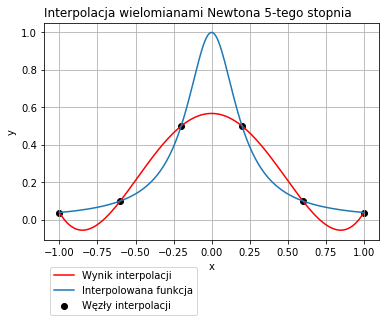

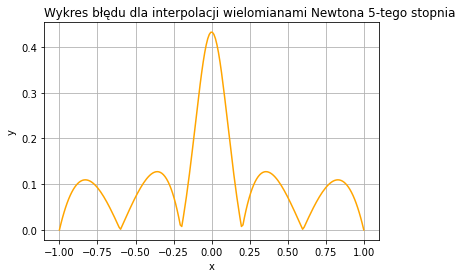

In [9]:
res,nodes = newton(func, 5, (-1,1))
plot_poly(func, res, "Interpolacja wielomianami Newtona 5-tego stopnia", nodes, (-1,1))
plot_error(func, res, "Wykres błędu dla interpolacji wielomianami Newtona 5-tego stopnia ", (-1,1))

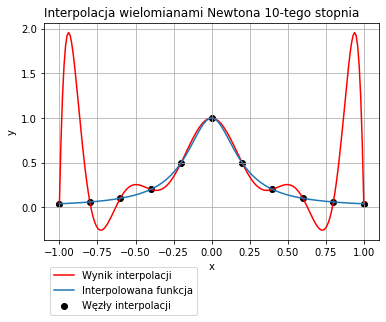

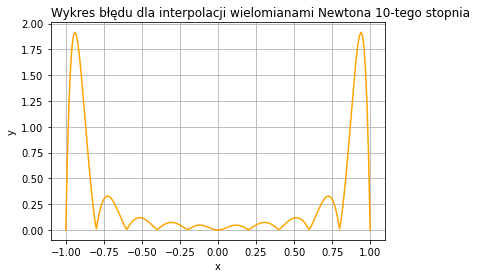

In [10]:
res,nodes = newton(func, 10, (-1,1))
plot_poly(func, res, "Interpolacja wielomianami Newtona 10-tego stopnia", nodes, (-1,1))
plot_error(func, res, "Wykres błędu dla interpolacji wielomianami Newtona 10-tego stopnia ", (-1,1))

#### c)

In [11]:
def chebyshev(func, deg, xlim):
    n = deg + 1
    nodes = []
    for i in range(1,n+1):
        nodes.append(np.cos((2*i - 1) * np.pi / (2*n)))
    y = [func.subs(x,el) for el in nodes]
    return interpolate.KroghInterpolator(nodes, y), nodes

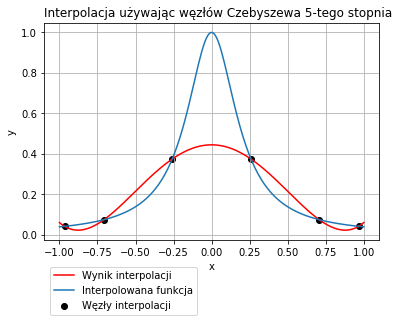

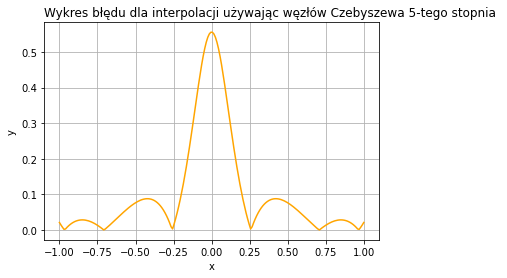

In [12]:
res,nodes = chebyshev(func, 5, (-1,1))
plot_poly(func, res, "Interpolacja używając węzłów Czebyszewa 5-tego stopnia", nodes, (-1,1))
plot_error(func, res, "Wykres błędu dla interpolacji używając węzłów Czebyszewa 5-tego stopnia ", (-1,1))

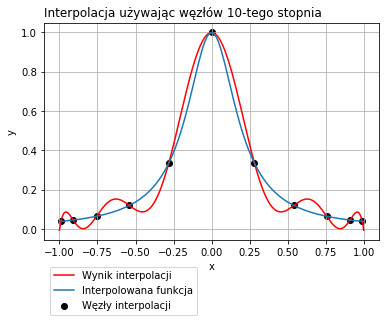

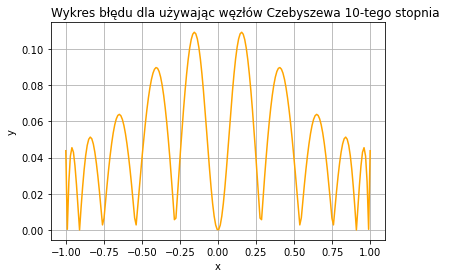

In [13]:
res,nodes = chebyshev(func, 10, (-1,1))
plot_poly(func, res, "Interpolacja używając węzłów 10-tego stopnia", nodes, (-1,1))
plot_error(func, res, "Wykres błędu dla używając węzłów Czebyszewa 10-tego stopnia ", (-1,1))

#### d)

In [14]:
def clamped_cubic_spline(func, deg, xlim):
    n = deg + 1
    nodes = np.linspace(xlim[0],xlim[1],n)
    y = [func.subs(x,el) for el in nodes]
    return interpolate.CubicSpline(nodes, y,bc_type="clamped"), nodes

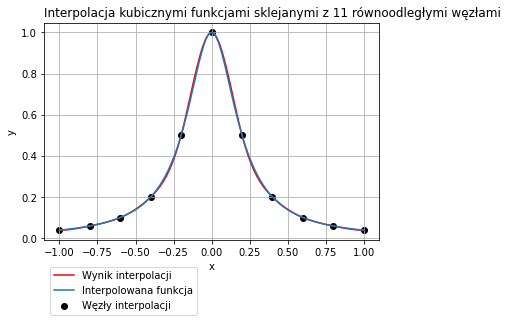

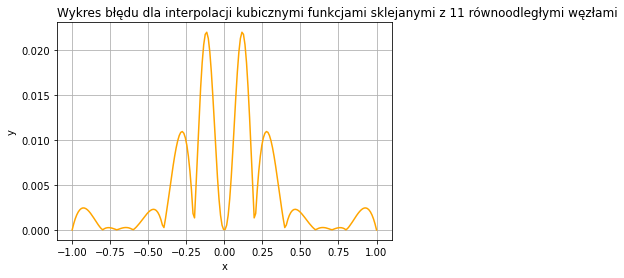

In [15]:
res,nodes = clamped_cubic_spline(func, 10, (-1,1))
plot_poly(func, res, "Interpolacja kubicznymi funkcjami sklejanymi z 11 równoodległymi węzłami", nodes, (-1,1))
plot_error(func, res, "Wykres błędu dla interpolacji kubicznymi funkcjami sklejanymi z 11 równoodległymi węzłami", (-1,1))

#### e) Wykresy znajdują się w poprzednich punktach. Poniżej znajdują się wykresy zbiorcze dla interpolacji o 11 węzłach.

In [16]:
def plot_multiple(func, title, lim):
    res1, tmp = newton(func, 10, (-1,1))
    res2, tmp = chebyshev(func, 10, (-1,1))
    res3, tmp = clamped_cubic_spline(func, 10, (-1,1))
    x_vals = np.linspace(lim[0], lim[1], 200)
    y_vals1 = res1(x_vals)
    y_vals2 = res2(x_vals)
    y_vals3 = res3(x_vals)
    y_vals_exact = [func.subs(x, val) for val in x_vals]
    nodes_vals = [func.subs(x, val) for val in nodes]
    plt.title(title, loc = 'left')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x_vals, y_vals1, label="Wynik interpolacji wielomianami Newtona", color="orange")
    plt.plot(x_vals, y_vals2, label="Wynik interpolacji używając węzłów Czebyszewa", color = "red")
    plt.plot(x_vals, y_vals3, label="Wynik interpolacji kubicznymi funkcjami sklejanymi", color ="black")
    plt.plot(x_vals,y_vals_exact, label="Interpolowana funkcja", color = "blue")
    plt.legend(bbox_to_anchor=(0.88, -0.1))
    plt.grid()
    plt.show()

In [17]:
def plot_errors(func, title, lim):
    res1, tmp = newton(func, 10, (-1,1))
    res2, tmp = chebyshev(func, 10, (-1,1))
    res3, tmp = clamped_cubic_spline(func, 10, (-1,1))
    x_vals = np.linspace(lim[0], lim[1], 200)
    y_vals = [[],[],[]]
    y_vals[0] = res1(x_vals)
    y_vals[1] = res2(x_vals)
    y_vals[2] = res3(x_vals)
    err = [[] for i in range(3)]
    
    for j in range(3):
        for i in range(len(x_vals)):
            err[j].append(np.abs(func.subs(x,x_vals[i])-y_vals[j][i]))
            
    y_vals_exact = [func.subs(x, val) for val in x_vals]
    nodes_vals = [func.subs(x, val) for val in nodes]
    plt.title(title, loc='left')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x_vals,  err[0], label="Błąd interpolacji wielomianami Newtona", color="orange")
    plt.plot(x_vals, err[1], label="Błąd interpolacji używając węzłów Czebyszewa", color = "red")
    plt.plot(x_vals, err[2], label="Błąd interpolacji kubicznymi funkcjami sklejanymi", color ="black")
    plt.legend(bbox_to_anchor=(0.85, -0.1))
    plt.grid()
    plt.show()

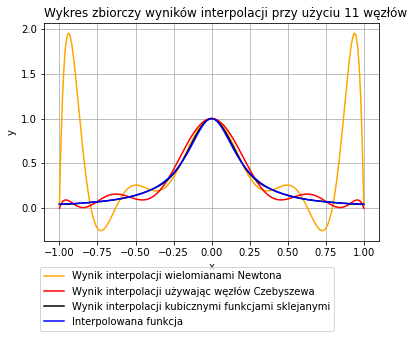

In [18]:
plot_multiple(func,  "Wykres zbiorczy wyników interpolacji przy użyciu 11 węzłów", (-1,1))

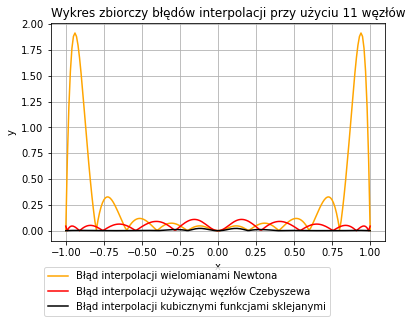

In [19]:
plot_errors(func,  "Wykres zbiorczy błędów interpolacji przy użyciu 11 węzłów", (-1,1))

#### f)

In [20]:
def compare_errors(func, n, xlim):
    points = np.random.uniform(xlim[0],xlim[1],n)
    res = [[],[],[]]
    errors = [[],[],[]]
    exact = [float(func.subs(x,point)) for point in points]
    interpolations = [None, None, None]
    interpolations[0], tmp = newton(func, 10, (-1,1))
    interpolations[1], tmp = chebyshev(func, 10, (-1,1))
    interpolations[2], tmp = clamped_cubic_spline(func, 10, (-1,1))
    

    for i in range(3):
        res[i] = interpolations[i](points)
        
    for i in range(3):
        for j,point in enumerate(points):
            errors[i].append(np.abs(exact[j]-res[i][j]))
    
    d = {'x': points,'f(x)': exact, 'Newton w': res[0],'Czebyszew w': res[1],
         'spline  w': res[2],'Newton b': errors[0],
             'Czebyszew b': errors[1],'spline  b': errors[2]}
    
    df = pd.DataFrame(data=d)
    return df

In [21]:
# w - wartość b - błąd
res = compare_errors(func, 25, (-1,1))
#print(res.to_latex(index=False,float_format="{:0.4f}".format))
res


,x,f(x),Newton w,Czebyszew w,spline w,Newton b,Czebyszew b,spline b
0,0.554506,0.115116,0.208394,0.128289,0.115910,0.093279,0.013173,0.000795
1,-0.237661,0.414581,0.377703,0.468564,0.406227,0.036879,0.053983,0.008355
2,0.113921,0.755030,0.801210,0.848140,0.776913,0.046180,0.093110,0.021883
3,-0.613681,0.096014,0.056312,0.151900,0.095877,0.039702,0.055886,0.000138
4,-0.923794,0.044773,1.882139,0.062687,0.042332,1.837366,0.017914,0.002441
5,0.415314,0.188248,0.209770,0.099238,0.189309,0.021522,0.089010,0.001060
6,0.385242,0.212301,0.192934,0.125228,0.210889,0.019367,0.087073,0.001412
7,0.219180,0.454340,0.435263,0.528317,0.449221,0.019077,0.073977,0.005119
8,0.097472,0.808067,0.850674,0.886896,0.828171,0.042606,0.078828,0.020103
9,-0.204432,0.489043,0.484681,0.576544,0.487680,0.004363,0.087501,0.001363


#### g)

Błąd interpolacji wielomianami Newtona

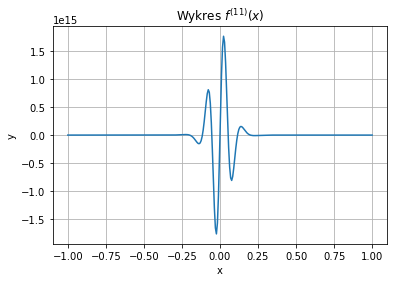

Maksimum wartości bezwzględnej: 1772190972761119.8


In [22]:
func_11 = diff(func,x,11)
points = np.linspace(-1,1,300)
res = [func_11.subs(x,p) for p in points]
plt.xlabel("x")
plt.plot(points, res)
plt.ylabel("y")
plt.title("Wykres $f^{(11)}(x)$")
plt.grid()
plt.show()
func_12 = diff(func,x,12)
polyRoots = solveset(func_12 , x)
potential_extrema = [np.float(np.abs(func_11.subs(x,p))) for p in polyRoots]
print("Maksimum wartości bezwzględnej:", max(potential_extrema))

In [23]:
print("Górne szacowanie błędu:",max(potential_extrema)*(0.2)**11/(4*11))

Górne szacowanie błędu: 824874.3436851762


Błąd interpolacji wielomianami z węzłami Czebyszewa

In [24]:
print("Górne szacowanie błędu:",2/(np.math.factorial(11)) * max(potential_extrema) * (0.5)**4)

Górne szacowanie błędu: 5549640.041164121


Błąd interpolacji funkcjami sklejanymi

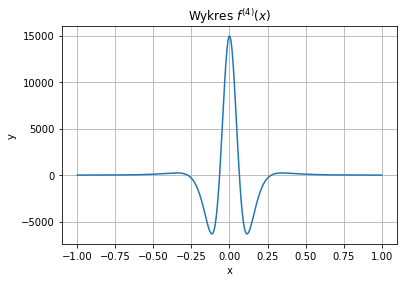

Maksimum wartości bezwzględnej: 15000.0


In [25]:
func_4 = diff(func,x,4)
points = np.linspace(-1,1,300)
res = [func_4.subs(x,p) for p in points]
plt.xlabel("x")
plt.plot(points, res)
plt.ylabel("y")
plt.title("Wykres $f^{(4)}(x)$")
plt.grid()
plt.show()
polyRoots = solveset(func_5 , x)
potential_extrema = [np.float(np.abs(func_4.subs(x,p))) for p in polyRoots]
print("Maksimum wartości bezwzględnej:", max(potential_extrema))

In [26]:
print("Górne szacowanie błędu:",max(potential_extrema)*5/384*(0.2)**4)

Górne szacowanie błędu: 0.31250000000000006


### Zadanie 4. ###

#### Wersja 1. - korzystająca z sympy ####

In [250]:
def lagrange_interpolation(expr, deg, xlim):
    n = deg + 1
    nodes = np.linspace(xlim[0],xlim[1],n)
    values = [expr(el) for el in nodes]
    L = []
    for i in range(n):
        m = 1
        d = 1
        for j in range(n):
            if j == i:
                continue
            d *= (x - nodes[j])
            m *= (nodes[i] - nodes[j])
        L.append(d/m)
    res = 0
    for i in range(n):
        res += values[i] * L[i]
    return (res, nodes)

In [ ]:
def plot_lagrange(expr, deg, lim, title):
    (func, nodes) = lagrange_interpolation(expr, deg, lim)
    x_vals = np.linspace(lim[0], lim[1], 200)
    y_vals = [func.subs(x, val) for val in x_vals]
    y_vals_exact = [expr.subs(x, val) for val in x_vals]
    nodes_vals = [expr.subs(x, val) for val in nodes]
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x_vals, y_vals, label="Wynik interpolacji")
    plt.plot(x_vals,y_vals_exact, label="Interpolowana funkcja")
    plt.scatter(nodes, nodes_vals, label="Węzły interpolacji", color = "black")
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.grid()
    plt.show()

#### Wersja 2. - Nie korzystająca z sympy ####

In [27]:
def lagrange_interpolation(expr, deg, xlim, point):
    n = deg + 1
    nodes = np.linspace(xlim[0],xlim[1],n)
    values = [expr(el) for el in nodes]
    L = []
    for i in range(n):
        m = 1
        d = 1
        for j in range(n):
            if j == i:
                continue
            d *= (point - nodes[j])
            m *= (nodes[i] - nodes[j])
        L.append(d/m)
    res = 0
    for i in range(n):
        res += values[i] * L[i]
    return res

In [28]:
def plot_lagrange(expr, deg, xlim, title):
    x_vals =  np.linspace(xlim[0], xlim[1], 400)
    y_vals = [lagrange_interpolation(expr, deg, xlim, point) for point in x_vals]
    nodes = np.linspace(xlim[0],xlim[1],deg+1)
    y_vals_exact = [expr(val) for val in x_vals]
    nodes_vals = [expr(val) for val in nodes]
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(x_vals, y_vals, label="Wynik interpolacji")
    plt.plot(x_vals,y_vals_exact, label="Interpolowana funkcja")
    plt.scatter(nodes, nodes_vals, label="Węzły interpolacji", color = "black")
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.grid()
    plt.show()

In [29]:
def func(val):
    return np.abs(np.sin(val))

#### Wykresy

Aby użyć pierwszej wersji należy zamiast func wpisać Abs(np.sin(x))

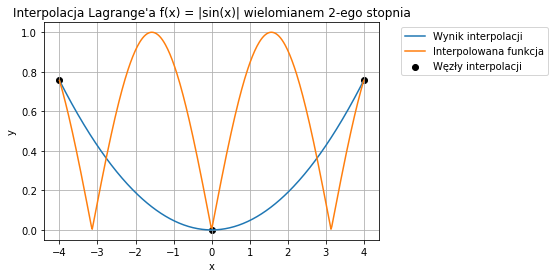

In [30]:
plot_lagrange(func, 2, (-4,4),"Interpolacja Lagrange'a f(x) = |sin(x)| wielomianem 2-ego stopnia")

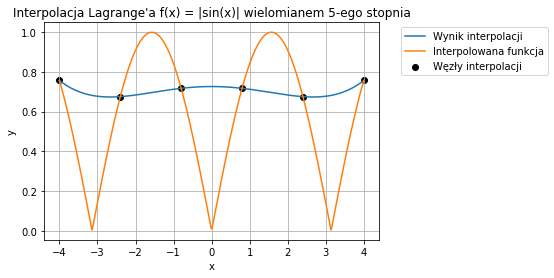

In [31]:
plot_lagrange(func, 5, (-4,4),"Interpolacja Lagrange'a f(x) = |sin(x)| wielomianem 5-ego stopnia")

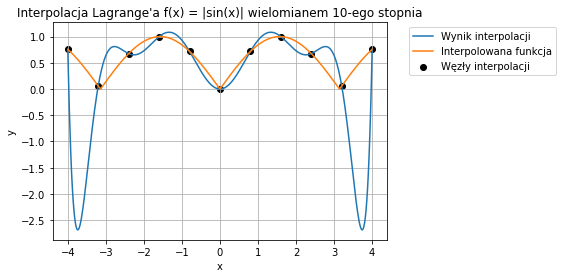

In [32]:
plot_lagrange(func, 10, (-4,4),"Interpolacja Lagrange'a f(x) = |sin(x)| wielomianem 10-ego stopnia")

#### Próba oszacowania błędu

In [2]:
def error(n):
    return (8**(n+1))/(4*(n+1)*n**(n+1))

In [9]:
n = 1
while error(n) > 10**(-10):
    n += 1
print(n)

20


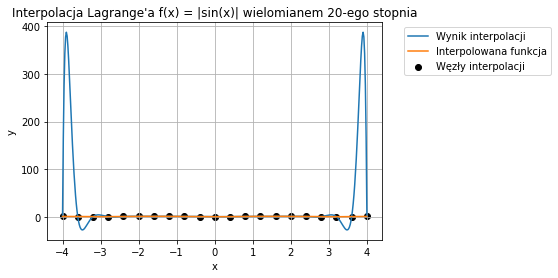

In [50]:
plot_lagrange(func, 20, (-4,4),"Interpolacja Lagrange'a f(x) = |sin(x)| wielomianem 20-ego stopnia")